# Ex7

In [1]:
%matplotlib inline
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import imageio
from mpl_toolkits.mplot3d import Axes3D 

## Part 1: Find Closest Centroids
Finding closest centroids.

In [2]:
data = sio.loadmat('ex7data2.mat')
X = data['X']

In [3]:
def find_closest_centroids(X, centroids):
    sqr_dist = np.sum((X[..., np.newaxis] - centroids.T) ** 2, 1)
    return np.argmin(sqr_dist,axis=1)


K = 3
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
print('Closest centroids for the first 3 examples:')
print(idx[:3]+1)
print('(the closest centroids should be 1, 3, 2 respectively)')

Closest centroids for the first 3 examples:
[1 3 2]
(the closest centroids should be 1, 3, 2 respectively)


## Part 2: Compute Means
Computing centroids means.

In [4]:
def compute_centroids(X, idx, K):
    centroids = np.empty((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[idx == i],0)
    return centroids


centroids = compute_centroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('(the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


## Part 3: K-Means Clustering
Running K-Means clustering on example dataset.

K-Means Done.


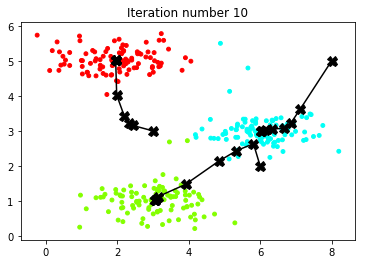

In [5]:
def draw_line(p1, p2, *varargin,**vkarargin):
    if not varargin:
        varargin = 'k'
        
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], *varargin, **vkarargin)
    
    
def plot_data_points(X, idx, K):
    plt.scatter(X[:,0], X[:, 1], 15, c=idx, cmap='hsv', vmin=0, vmax=K+1)
    
    
def plot_progress_k_means(X, centroids, previous, idx, K, i):
    plt.plot(centroids[:, 0], centroids[:, 1], 'Xk', markeredgecolor = 'k', markersize=10, linewidth=3)
    for i in range(centroids.shape[0]):
        draw_line(centroids[i], previous[i])
    
def run_k_means(X ,initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    
    for i in range(max_iters):
        #print(f'K-Means iteration {i + 1}/{max_iters}')
        idx = find_closest_centroids(X ,centroids)
        if plot_progress:
            plot_progress_k_means(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx
data = sio.loadmat('ex7data2.mat')
X = data['X']
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])
centroids, idx = run_k_means(X ,initial_centroids, max_iters, True)
plt.title(f'Iteration number {max_iters}')
plot_data_points(X, idx, K)
print('K-Means Done.')

## Part 4: K-Means Clustering on Pixels
Running K-Means clustering on pixels from an image.

In [6]:
def k_means_init_centroids(X, K):
    choice = np.random.choice(X.shape[0], K, replace=False)
    return X[choice]
A = imageio.imread('bird_small.png')
A = A / 255
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3)
K = 16
max_iters = 10
initial_centroids = k_means_init_centroids(X, K)
centroids, idx = run_k_means(X, initial_centroids, max_iters)

## Part 5: Image Compression
Applying K-Means to compress an image.

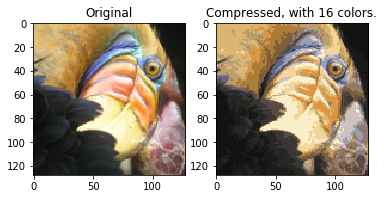

In [7]:
idx = find_closest_centroids(X, centroids)
X_recovered = centroids[idx, :]
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title(f'Compressed, with {K} colors.');

# Ex7_pca
## Part 1: Load Example Dataset
Visualizing example dataset for PCA.

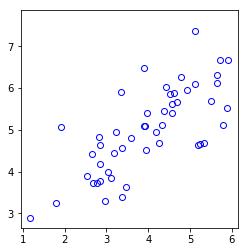

In [8]:
data = sio.loadmat('ex7data1.mat')
X = data['X']
plt.plot(X[:, 0], X[:,1], 'bo', fillstyle='none')
plt.axis([0.5, 6.5, 2, 8])
plt.axis('square');

## Part 2: Principal Component Analysis
Running PCA on example dataset.<br>
### Covariance matrix:
$$\large \Sigma=\frac{1}{m}X^TX$$

Top eigenvector:
U(:,1) = -0.7071067811865476 -0.7071067811865476
(you should expect to see -0.707107 -0.707107)


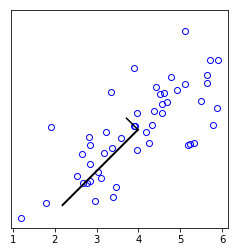

In [9]:
def feature_normalize(X):
    mu = np.mean(X, 0)
    X_norm = X - mu
    sigma = np.std(X_norm, 0, ddof=1)
    return X_norm/sigma, mu, sigma


def pca(X):
    m, n = X.shape
    cov = X.T @ X / m
    U, S, _ = np.linalg.svd(cov,compute_uv=True)
    return U , S

plt.plot(X[:, 0], X[:,1], 'bo', fillstyle='none')
plt.axis([0.5, 6.5, 2, 8])
plt.axis('square')

X_norm, mu, sigma = feature_normalize(X)
U, S = pca(X_norm)
draw_line(mu, mu + 1.5 * S[0] * U[:,0].T,'-k', linewidth=2)
draw_line(mu, mu + 1.5 * S[1] * U[:,1].T,'-k', 'linewidth=2')

print('Top eigenvector:')
print(f'U(:,1) = {U[0,0]} {U[1,0]}')
print('(you should expect to see -0.707107 -0.707107)')

## Part 3: Dimension Reduction
Dimension reduction on example dataset.

Projection of the first example: [1.48127391]
(this value should be about 1.481274)
Approximation of the first example: -1.0474188259204964 -1.0474188259204964
(this value should be about  -1.047419 -1.047419)


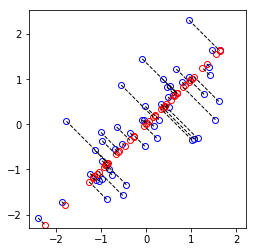

In [10]:
def project_data(X, U, K):
    return X @ U[:,:K]


def recover_data(Z, U, K):
    return Z @ U[:,:K].T

plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', fillstyle='none')
plt.axis([-4, 3, -4, 3])
plt.axis('square')

K = 1
Z = project_data(X_norm, U, K)
print(f'Projection of the first example: {Z[0]}') 
print('(this value should be about 1.481274)')
X_rec  = recover_data(Z, U, K)
print(f'Approximation of the first example: {X_rec[0, 0]} {X_rec[0, 1]}')
print('(this value should be about  -1.047419 -1.047419)')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro', fillstyle='none')
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:], X_rec[i,:], '--k', linewidth=1)

## Part 4: Loading and Visualizing Face Data
Loading face dataset.

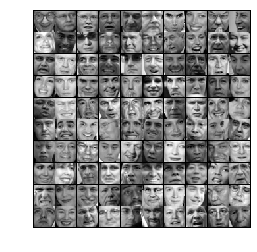

In [11]:
def display_data(X, example_width=None):
    m, n = X.shape
    if not example_width:
        example_width = np.round(np.sqrt(n)).astype(int)
    example_height = (n / example_width).astype(int)
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)
    
    pad = 1
    display_array = -np.ones((pad + display_rows * (example_height + pad),
                              pad + display_cols * (example_width + pad)))
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            max_val = np.max(np.abs(X[curr_ex]))
            x_l = pad + j * (example_height + pad)
            x_r = x_l + example_height
            y_l = pad + i * (example_width + pad)
            y_r = y_l + example_width
            display_array[x_l:x_r,y_l:y_r]= X[curr_ex].reshape(example_height, example_width).T / max_val
            curr_ex += 1

        if curr_ex >= m:
            break
    plt.imshow(display_array, cmap='gray')
    plt.axis('off')

data = sio.loadmat('ex7faces.mat')
X = data['X']
display_data(X[:100])

## Part 5: PCA on Face Data: Eigenfaces
Running PCA on face dataset.<br>
(this might take a minute or two ...)

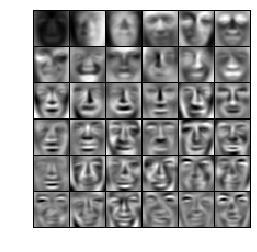

In [12]:
X_norm, mu, sigma = feature_normalize(X)
U, S = pca(X_norm)
display_data(U[:, :36].T);

## Part 6: Dimension Reduction for Faces
Dimension reduction for face dataset.

In [13]:
K = 100
Z = project_data(X_norm, U, K)
print('The projected data Z has a size of: ')
print(Z.shape)

The projected data Z has a size of: 
(5000, 100)


## Part 7: Visualization of Faces after PCA Dimension Reduction
Visualizing the projected (reduced dimension) faces.

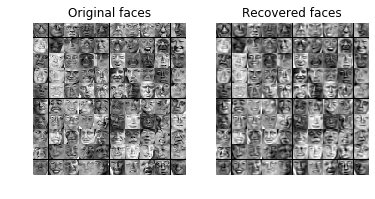

In [14]:
K = 100
X_rec = recover_data(Z, U, K)

plt.figure()
plt.subplot(1, 2, 1)
display_data(X_norm[:100])
plt.title('Original faces')
plt.subplot(1, 2, 2)
display_data(X_rec[:100])
plt.title('Recovered faces');

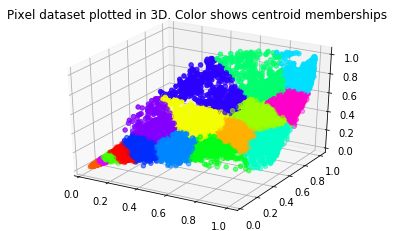

In [15]:
A = imageio.imread('bird_small.png')
A = A / 255
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3)
K = 16
max_iters = 10
initial_centroids = k_means_init_centroids(X, K)
centroids, idx = run_k_means(X, initial_centroids, max_iters)
sel = np.random.choice(1000, X.shape[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=idx, cmap='hsv', vmin=0, vmax=K+1)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships');

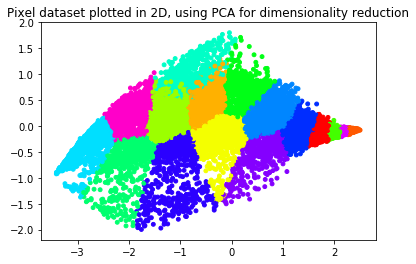

In [16]:
X_norm, mu, sigma = feature_normalize(X)
U, S = pca(X_norm)
Z = project_data(X_norm, U, 2)
plot_data_points(Z, idx, K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');